In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [4]:
df= pd.read_csv('Dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode())

In [7]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['charges'] = le.fit_transform(df['charges'])


In [11]:
x = df.drop(columns='charges',axis=1)
y = df['charges']
x.head()


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    # "XGBoost": XGBRegressor(),
    # "LightGBM": LGBMRegressor()
}


In [14]:
results = {}
col  = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']
input_values = []
names = []

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\

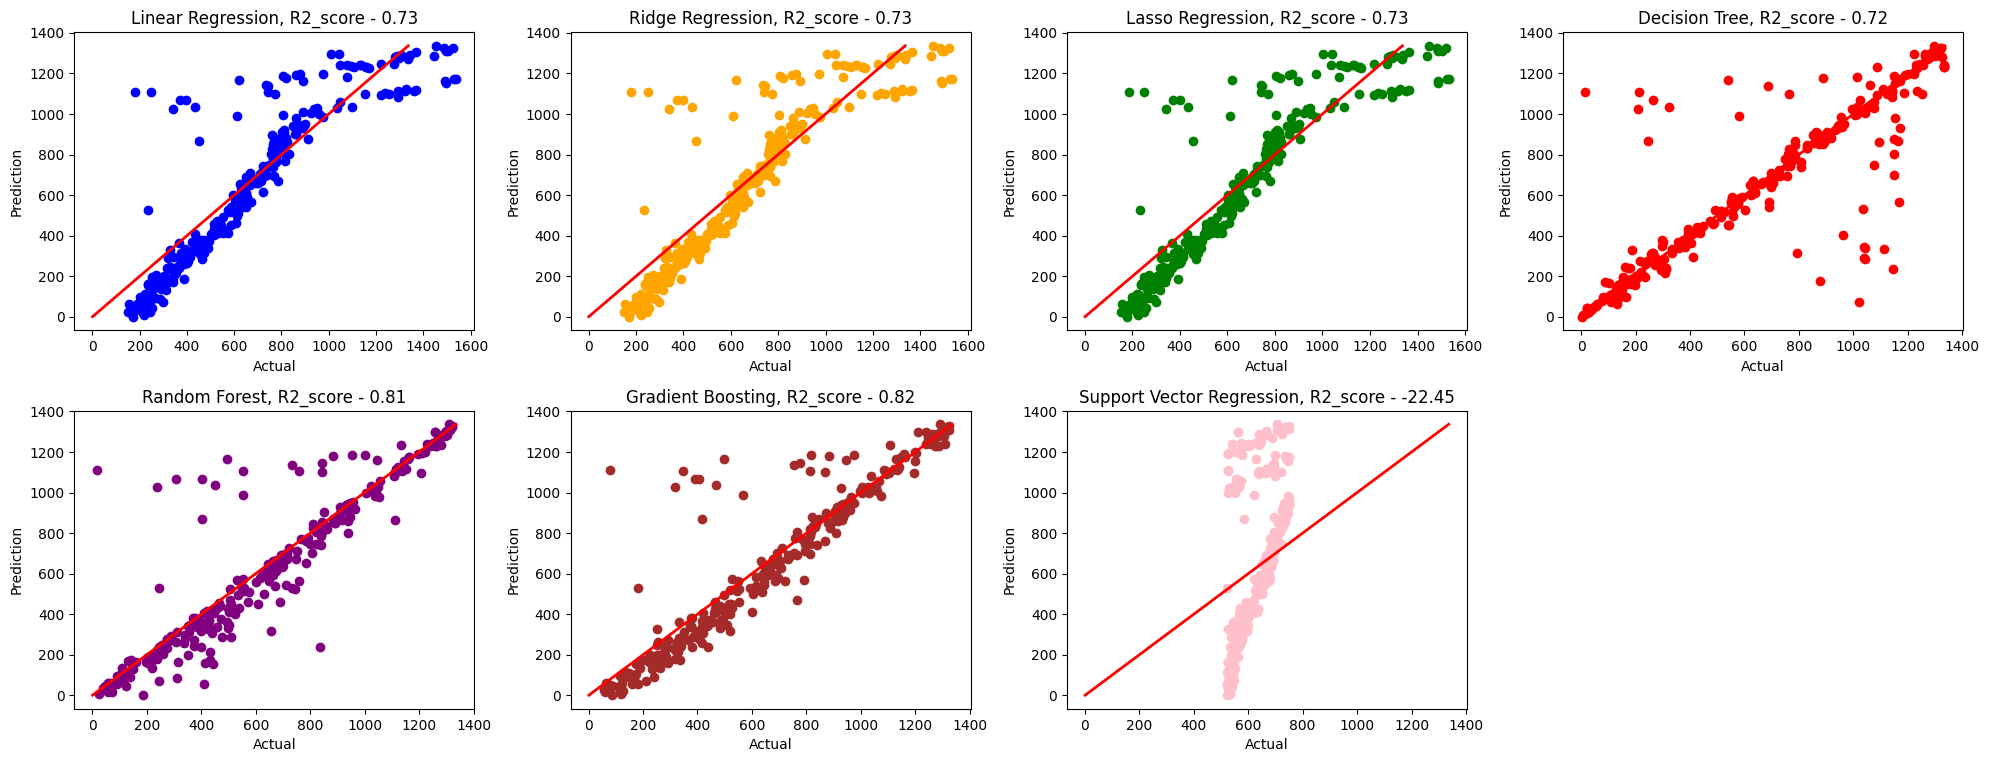

In [15]:
plt.figure(figsize=(20, 30))


for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    r2 = r2_score(y_pred, y_test)

    a = [[28	,2	,43.780,	2	,1,	4]]

    input_values.append(model.predict(a))
    names.append(name)
    results[name] = {
        'Mean absolute error': mae,
        'Mean square error': mse,
        'R2 score': r2
    }

    plt.subplot(8, 4, i)
    plt.scatter(y_pred, y_test, color=col[i-1])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f"{name}, R2_score - {r2:.2f}")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")

plt.tight_layout()
plt.show()

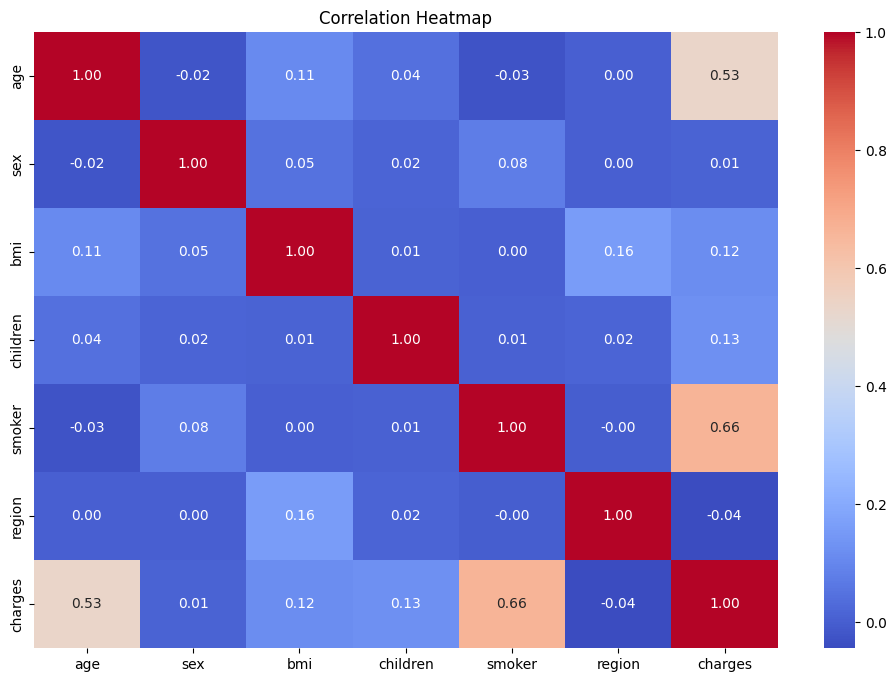

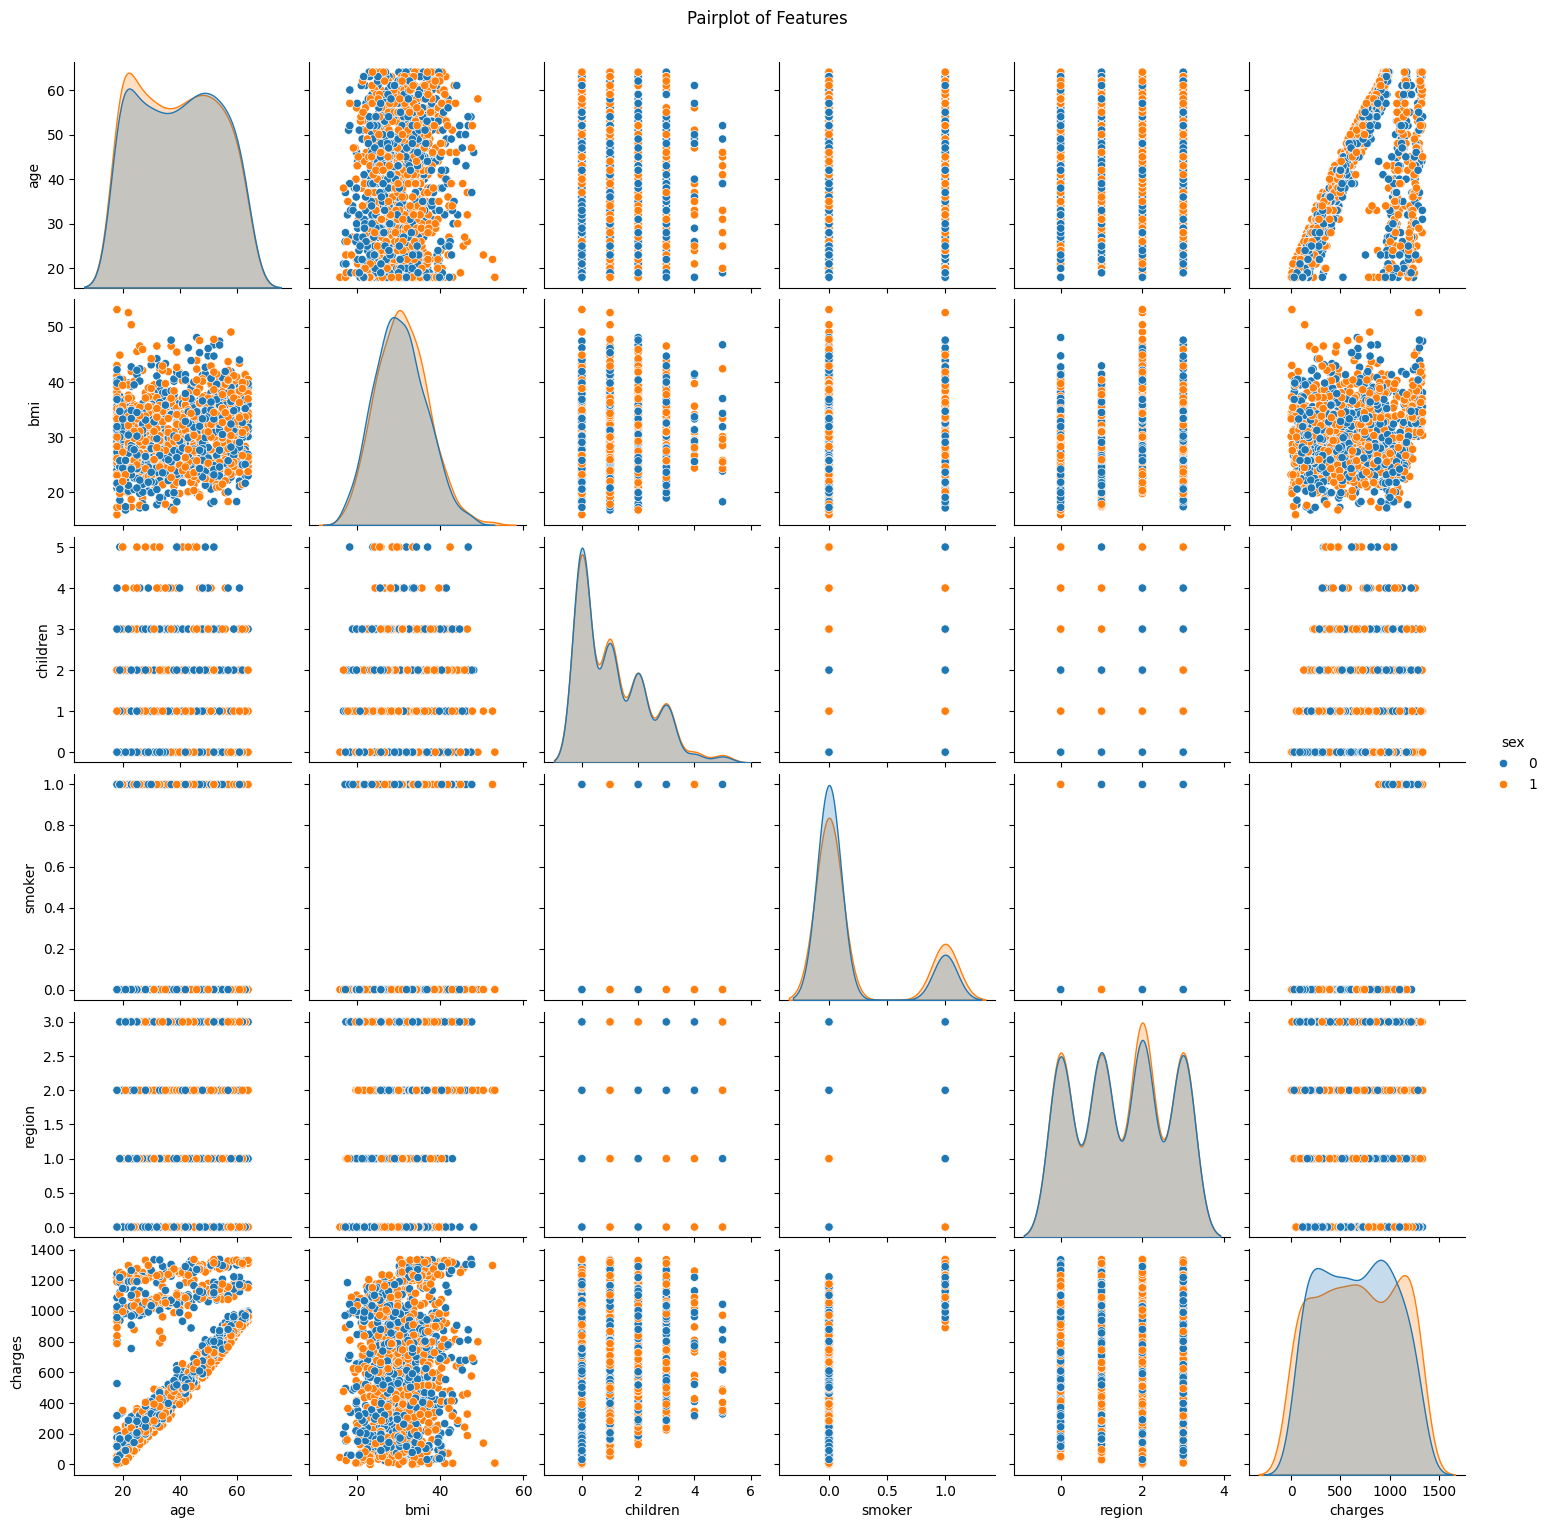

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, diag_kind='kde', hue='sex')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [25]:
result_df = pd.DataFrame(results).T
values = pd.DataFrame(input_values).T
values.columns = names

print(result_df)
print(values)

                           Mean absolute error  Mean square error   R2 score
Linear Regression                   126.339705       32491.947255   0.732628
Ridge Regression                    126.558370       32489.760272   0.730735
Lasso Regression                    126.586102       32514.093769   0.728916
Decision Tree                        91.511194       46386.638060   0.717078
Random Forest                        80.902034       26216.334324   0.808513
Gradient Boosting                    84.894301       23830.026490   0.815954
Support Vector Regression           302.773160      128399.977513 -22.450538
   Linear Regression  Ridge Regression  Lasso Regression  Decision Tree  \
0        1016.644025       1014.228008       1018.967305         1247.0   

   Random Forest  Gradient Boosting  Support Vector Regression  
0        1283.92        1240.926396                 567.997927  
